# Relaxation Mode

In [1]:
from saeno.FiniteBodyForces import FiniteBodyForces
    
# initialize the object
M = FiniteBodyForces()

In [2]:
from saeno.materials import SemiAffineFiberMaterial

# provide a material model
material = SemiAffineFiberMaterial(1645, 0.0008, 0.0075, 0.033)
M.setMaterialModel(material)

In [3]:
import numpy as np

# define the coordinates of the nodes of the mesh
# the array has to have the shape N_n x 3
R = np.array([[0., 0., 0.],  # 0
              [0., 1., 0.],  # 1
              [1., 1., 0.],  # 2
              [1., 0., 0.],  # 3
              [0., 0., 1.],  # 4
              [1., 0., 1.],  # 5
              [1., 1., 1.],  # 6
              [0., 1., 1.]]) # 7

# define the tetrahedra of the mesh
# the array has to have the shape N_t x 4
# every entry is an index referencing a verces in R (indices start with 0)
T = np.array([[0, 1, 7, 2],
              [0, 2, 5, 3],
              [0, 4, 5, 7],
              [2, 5, 6, 7],
              [0, 7, 5, 2]])

# define if the nodes are "variable", e.g. allowed to be moved by the solver
# a boolean matrix with shape N_n
#                   0      1      2      3      4      5      6      7
var = np.array([False, False,  True,  True, False,  True,  True, False])

# the initial displacements of the nodes
# if the node is fixed (e.g. not variable) than this displacement will be fixed
# during the solving
U = np.array([[ 0.  ,  0.  ,  0.  ],  # 0
              [ 0.  ,  0.  ,  0.  ],  # 1
              [ 0.  ,  0.  ,  0.  ],  # 2
              [ 0.  ,  0.  ,  0.  ],  # 3
              [ 0.  ,  0.  ,  0.  ],  # 4
              [ 0.  ,  0.  ,  0.  ],  # 5
              [ 0.  ,  0.  ,  0.  ],  # 6
              [ 0.  ,  0.  ,  0.  ]]) # 7

# for the variable nodes, we can specify the target force.
# this is the force that the material applies after solving onto the nodes
# therefore for a pull to the right (positive x-direction) we have to provide
# a target force to the left (negative x-direction)
F_ext = np.array([[ 0. ,  0.  ,  0.  ],  # 0
                  [ 0. ,  0.  ,  0.  ],  # 1
                  [-2.5,  0.  ,  0.  ],  # 2
                  [-2.5,  0.  ,  0.  ],  # 3
                  [ 0. ,  0.  ,  0.  ],  # 4
                  [-2.5,  0.  ,  0.  ],  # 5
                  [-2.5,  0.  ,  0.  ],  # 6
                  [ 0. ,  0.  ,  0.  ]]) # 7

In [4]:
# provide the node data
M.setNodes(R, var, U, F_ext)
# and the tetrahedron data
M.setTetrahedra(T)

In [5]:
# relax the mesh and move the "varible" nodes
M.relax()

updating forces and stiffness matrix finished 3.74s
updating forces and stiffness matrix finished 0.09s
Newton  0 : du= 0.00010939502396638188   Energy= 0.0031590583376867993   Residuum= 0.4572756170424468
updating forces and stiffness matrix finished 0.06s
Newton  1 : du= 0.0001415107587113432   Energy= 0.011884145816101402   Residuum= 1.6143429011241879
updating forces and stiffness matrix finished 0.06s
Newton  2 : du= 0.00018113918265852185   Energy= 0.024702611677814814   Residuum= 3.2280055624442134
updating forces and stiffness matrix finished 0.07s
Newton  3 : du= 0.00015057254204701285   Energy= 0.03877020687930312   Residuum= 5.041498350306811
updating forces and stiffness matrix finished 0.09s
Newton  4 : du= 0.00010810159858197086   Energy= 0.052503967119413006   Residuum= 6.897654048819133
updating forces and stiffness matrix finished 0.09s
Newton  5 : du= 7.428224089474375e-05   Energy= 0.06526280632257556   Residuum= 8.710446113097255
updating forces and stiffness matrix

In [6]:
# store the forces of the nodes
M.storeF("F.dat")
# store the positions and the displacements
M.storeRAndU("R.dat", "U.dat")
# store the center of each tetrahedron and a combined list with energies and volumina of the tetrahedrons
M.storeEandV("RR.dat", "EV.dat")

F.dat stored.
R.dat stored.
U.dat stored.
RR.dat stored.
EV.dat stored.


In [7]:
# the resulting displacement
np.set_printoptions(precision=3, suppress=True)
M.U

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.022, -0.013,  0.013],
       [ 0.049,  0.034,  0.034],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.022,  0.013, -0.013],
       [ 0.049, -0.034, -0.034],
       [ 0.   ,  0.   ,  0.   ]])

In [8]:
# the resulting forces on the nodes
M.f_glo

array([[ 2.885,  0.757,  0.757],
       [ 1.876, -0.743,  0.743],
       [-2.374, -0.008,  0.008],
       [-2.387,  0.008,  0.008],
       [ 1.876,  0.743, -0.743],
       [-2.374,  0.008, -0.008],
       [-2.387, -0.008, -0.008],
       [ 2.885, -0.757, -0.757]])

In [9]:
# the new position of the nodes
M.R+M.U

array([[0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.022, 0.987, 0.013],
       [1.049, 0.034, 0.034],
       [0.   , 0.   , 1.   ],
       [1.022, 0.013, 0.987],
       [1.049, 0.966, 0.966],
       [0.   , 1.   , 1.   ]])

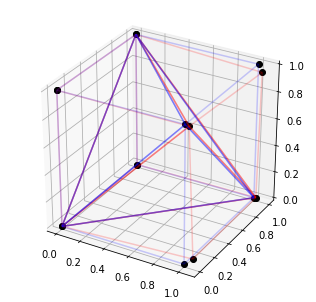

In [11]:
# visualize the meshes
M.plotMesh(use_displacement=False)
M.plotMesh(use_displacement=True)